#Customer churn prediction


---
Churn prediction is an important topic in the domain of business analytics and customer relationship management. It revolves around the process of identifying if a customer is likely to cancel a service, stop using a product or stop having a relationship with the busines entity at all.

It is a crucial metric for businesses that operate on a subscription-based or ongoing customer engagement model, such as telecommunications and banking. Such metric is important to to maximize cost efficiency and customer lifetime value.

##Content
---
The dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

1. Customer ID: A unique identifier for each customer
2. Surname: The customer's surname or last name
3. Credit Score: A numerical value representing the customer's credit score
4. Geography: The country where the customer resides (France, Spain or Germany)
4. Gender: The customer's gender (Male or Female)
5. Age: The customer's age.
1. Tenure: The number of years the customer has been with the bank
1. Balance: The customer's account balance
1. NumOfProducts: The number of bank products the customer uses (e.g., 1. savings account, credit card)
1. HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
1. IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
1. EstimatedSalary: The estimated salary of the customer
1. Exited: Whether the customer has churned (1 = yes, 0 = no)


---

Link to dataset: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction


#Importing needed libraries

In [26]:
pip install scikit-optimize

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from skopt import BayesSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
raw_df = pd.read_csv('/content/drive/MyDrive/ai4cm_datasets/Churn_Modelling.csv')
raw_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


RowNumber and Surname are irrelevant columns to this task so they will be dropped later on.  

#Explanatory Data Analysis

In [29]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


The dataset contains predominately float and int values so not much processing is needed for the objects.

In [30]:
raw_df.describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,90%,99%,max
RowNumber,10002.0,5.001500e+03,2887.472338,1.00,1.010100e+02,5.010500e+02,2501.25,5001.50,7.501750e+03,9.001900e+03,9.901990e+03,10000.00
CustomerId,10002.0,1.569093e+07,71931.769345,15565701.00,1.556851e+07,1.557883e+07,15628524.75,15690732.00,1.575323e+07,1.579083e+07,1.581311e+07,15815690.00
CreditScore,10002.0,6.505551e+02,96.661615,350.00,4.320000e+02,4.890000e+02,584.00,652.00,7.180000e+02,7.780000e+02,8.500000e+02,850.00
Age,10001.0,3.892231e+01,10.487200,18.00,2.100000e+01,2.500000e+01,32.00,37.00,4.400000e+01,5.300000e+01,7.200000e+01,92.00
Tenure,10002.0,5.012498e+00,2.891973,0.00,0.000000e+00,1.000000e+00,3.00,5.00,7.000000e+00,9.000000e+00,1.000000e+01,10.00
Balance,10002.0,7.649111e+04,62393.474144,0.00,0.000000e+00,0.000000e+00,0.00,97198.54,1.276478e+05,1.492369e+05,1.859663e+05,250898.09
NumOfProducts,10002.0,1.530194e+00,0.581639,1.00,1.000000e+00,1.000000e+00,1.00,1.00,2.000000e+00,2.000000e+00,3.000000e+00,4.00
HasCrCard,10001.0,7.055294e-01,0.455827,0.00,0.000000e+00,0.000000e+00,0.00,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.000000e+00,0.000000e+00,0.00,1.00,1.000000e+00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10002.0,1.000833e+05,57508.117802,11.58,1.843333e+03,9.854774e+03,50983.75,100185.24,1.493837e+05,1.796728e+05,1.980697e+05,199992.48


In [31]:
raw_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [32]:
raw_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   73
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

##Graphs


---
We will be plotting different graphs to see the relationship between the IsActiveMember column which represents the customer churn and the other columns but also between different columns to try to find relationships between said columns.


###Distribution of churners

---
In this pie plot we want to facilitate the distribution of the customers that churned and the ones that did not. As seen and as expected, our clients are predominantly loyal customers.

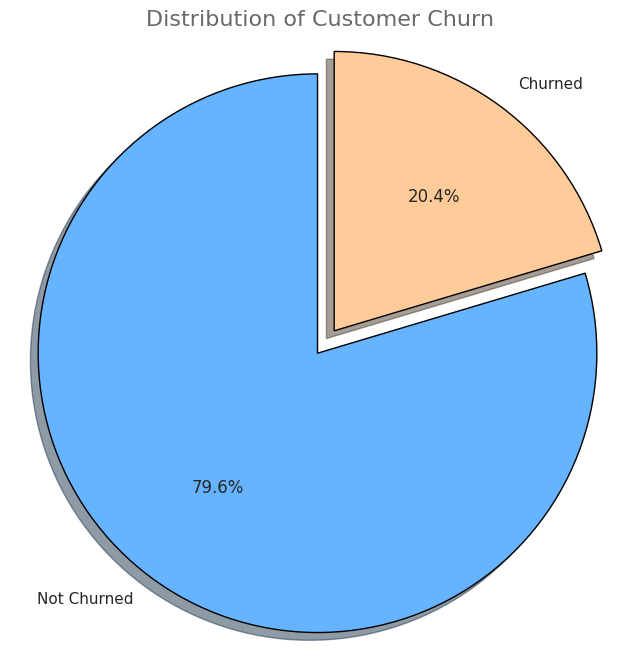

In [33]:

churn_counts = raw_df['Exited'].value_counts()

colors = ['#66b3ff', '#ffcc99']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Customer Churn', fontsize=16, color='dimgrey')

plt.axis('equal')

plt.show()

###Age dristribution


---
Plotting the age distribution of the clients on the dataset.


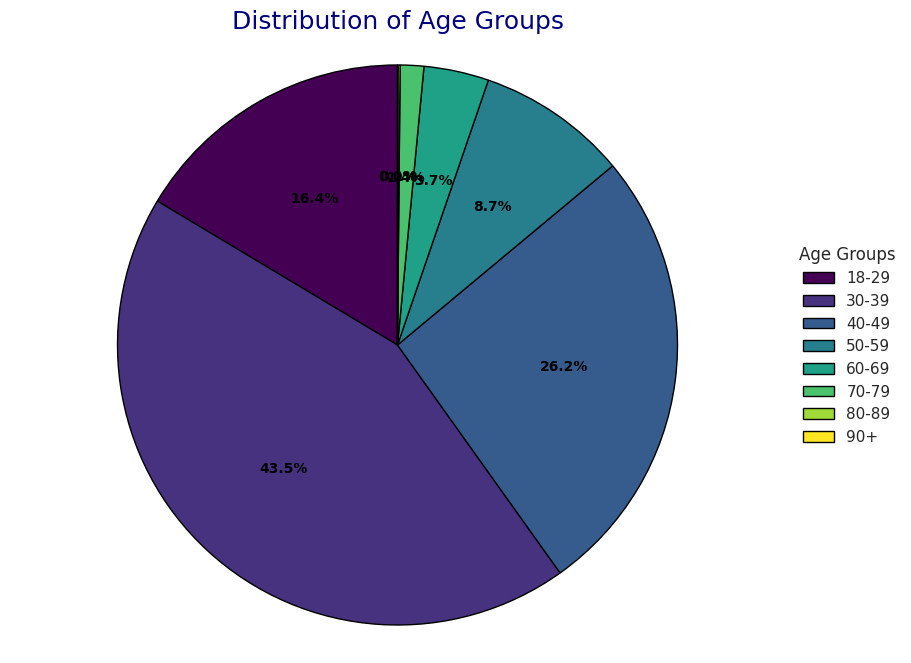

In [34]:
bins = [18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']
raw_df['AgeGroup'] = pd.cut(raw_df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = raw_df['AgeGroup'].value_counts().sort_index()


plt.figure(figsize=(10, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
wedges, texts, autotexts = plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=colors,
                                   textprops=dict(color="w"), wedgeprops=dict(edgecolor="black"))

plt.title('Distribution of Age Groups', fontsize=18, color='navy')

plt.setp(texts, size=12, weight="bold")
plt.setp(autotexts, size=10, weight="bold", color="black")

raw_df.drop(columns='AgeGroup', inplace=True)

plt.axis('equal')
plt.legend(wedges, labels, title="Age Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

###Churn rate by age


---
Plotting the relationship between the age of the customers and their churn rate. At first we will be plotting all ages for a more detailed graph and then all age groups for a more compact one.


<ipython-input-35-0bfeec25b899>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


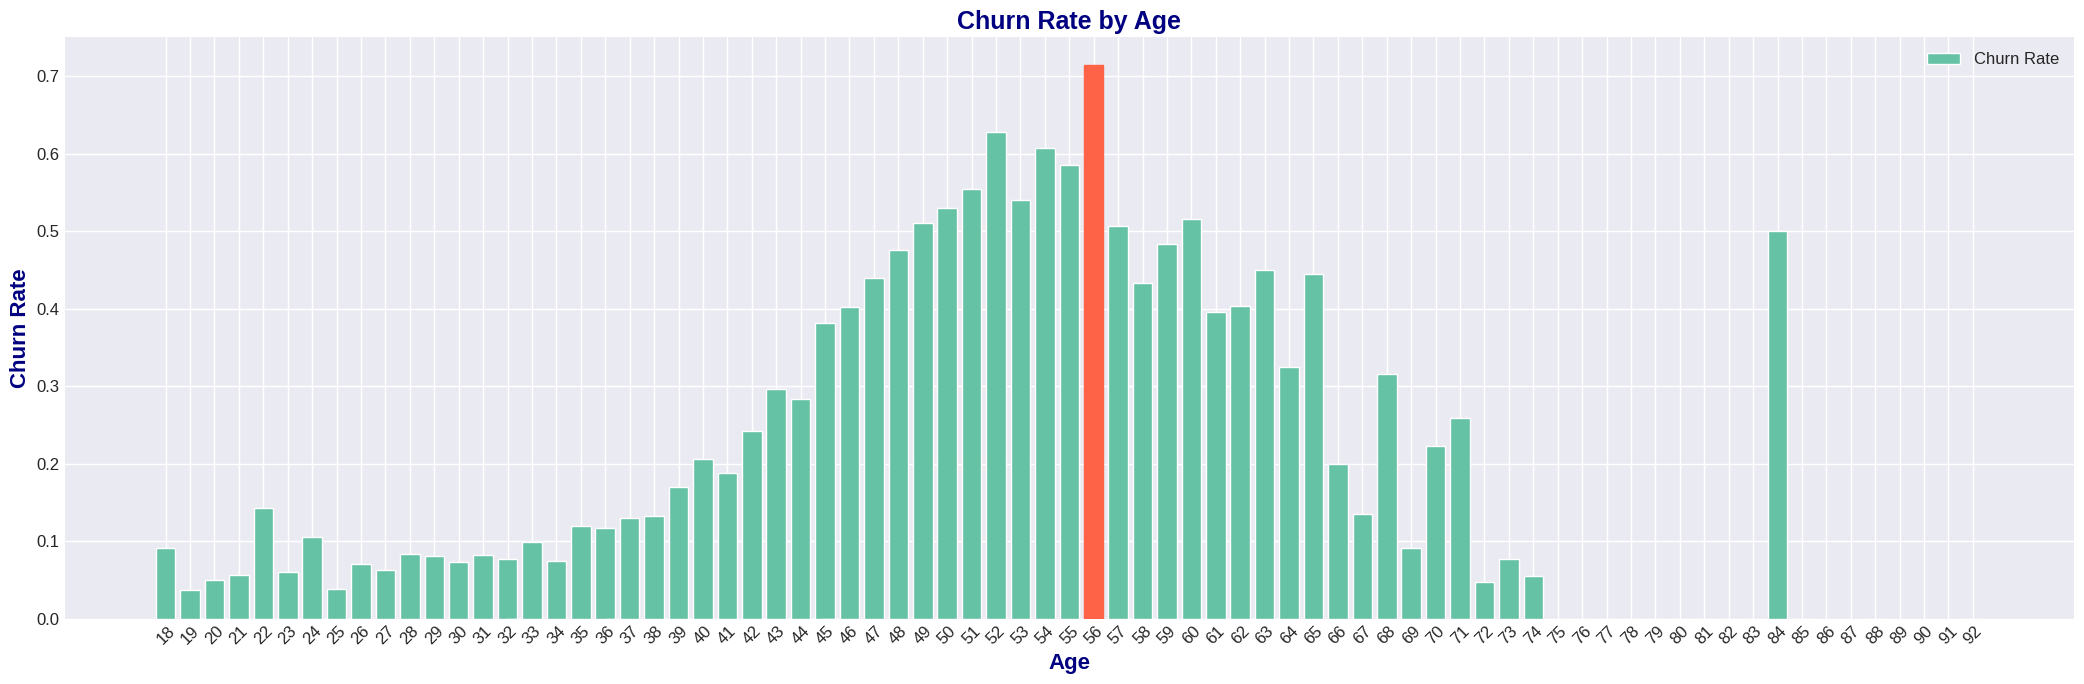

In [35]:

plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

age_churn_rate = raw_df.groupby('Age')['Exited'].mean()


plt.figure(figsize=(21, 7))
bars = plt.bar(age_churn_rate.index, age_churn_rate.values, color=palette(0))

# Add some color contrast to highlight the highest churn rate
max_churn_rate = age_churn_rate.max()
for bar in bars:
    if bar.get_height() == max_churn_rate:
        bar.set_color('tomato')  # Change color to tomato for the highest churn rate


plt.title('Churn Rate by Age', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Age', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Churn Rate', fontsize=16, fontweight='bold', color='navy')
plt.xticks(rotation=45, fontsize=12)

plt.xticks(ticks=range(int(age_churn_rate.index.min()), int(age_churn_rate.index.max()) + 1, 1), rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.legend(['Churn Rate', 'Maximum Churn Rate'], fontsize=12)

plt.tight_layout()
plt.show()


as we can see below, after 35 years of age, the more the age increaes the more does churning increases but also hitting the peak at 56 the churn rate tends to drop although it is still high.

###Tenure and churn rate

---
Plotting the relationship between the tenure and the churn rate for our customers to see how much tenure affects the churning of the customers.


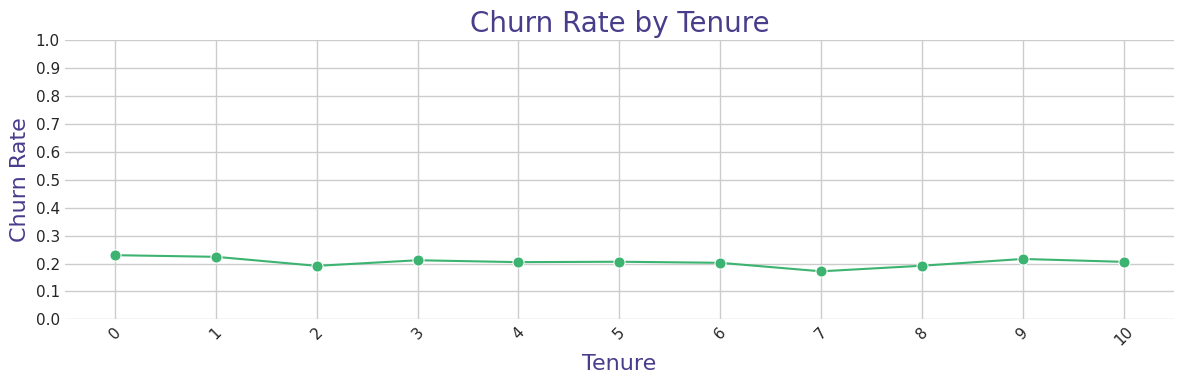

In [36]:
tenure_churn_rate = raw_df.groupby('Tenure')['Exited'].mean().reset_index()

plt.figure(figsize=(12, 4))
sns.set_style("whitegrid")

sns.lineplot(x='Tenure', y='Exited', data=tenure_churn_rate, marker='o', color='mediumseagreen', markersize=8)

plt.title('Churn Rate by Tenure', fontsize=20, color='darkslateblue')
plt.xlabel('Tenure', fontsize=16, color='darkslateblue')
plt.ylabel('Churn Rate', fontsize=16, color='darkslateblue')

plt.xticks(tenure_churn_rate['Tenure'], rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))

plt.tight_layout()
plt.show()


The churn rate based on the tenure over the years tends to be decently stable. This could possibly imply that tenure is not an important factor in cutomer churning with respect to this dataset. As a matter of fact, the longer the tenure, the lower the customer churn tends to be, implying that the longer we keep our customers satisified the more they are likely to remain loyal to our company.

###Credit score and churn rate

---
Showing the relation between the credit score and the churn rate on a graph to try to establish a correlation.


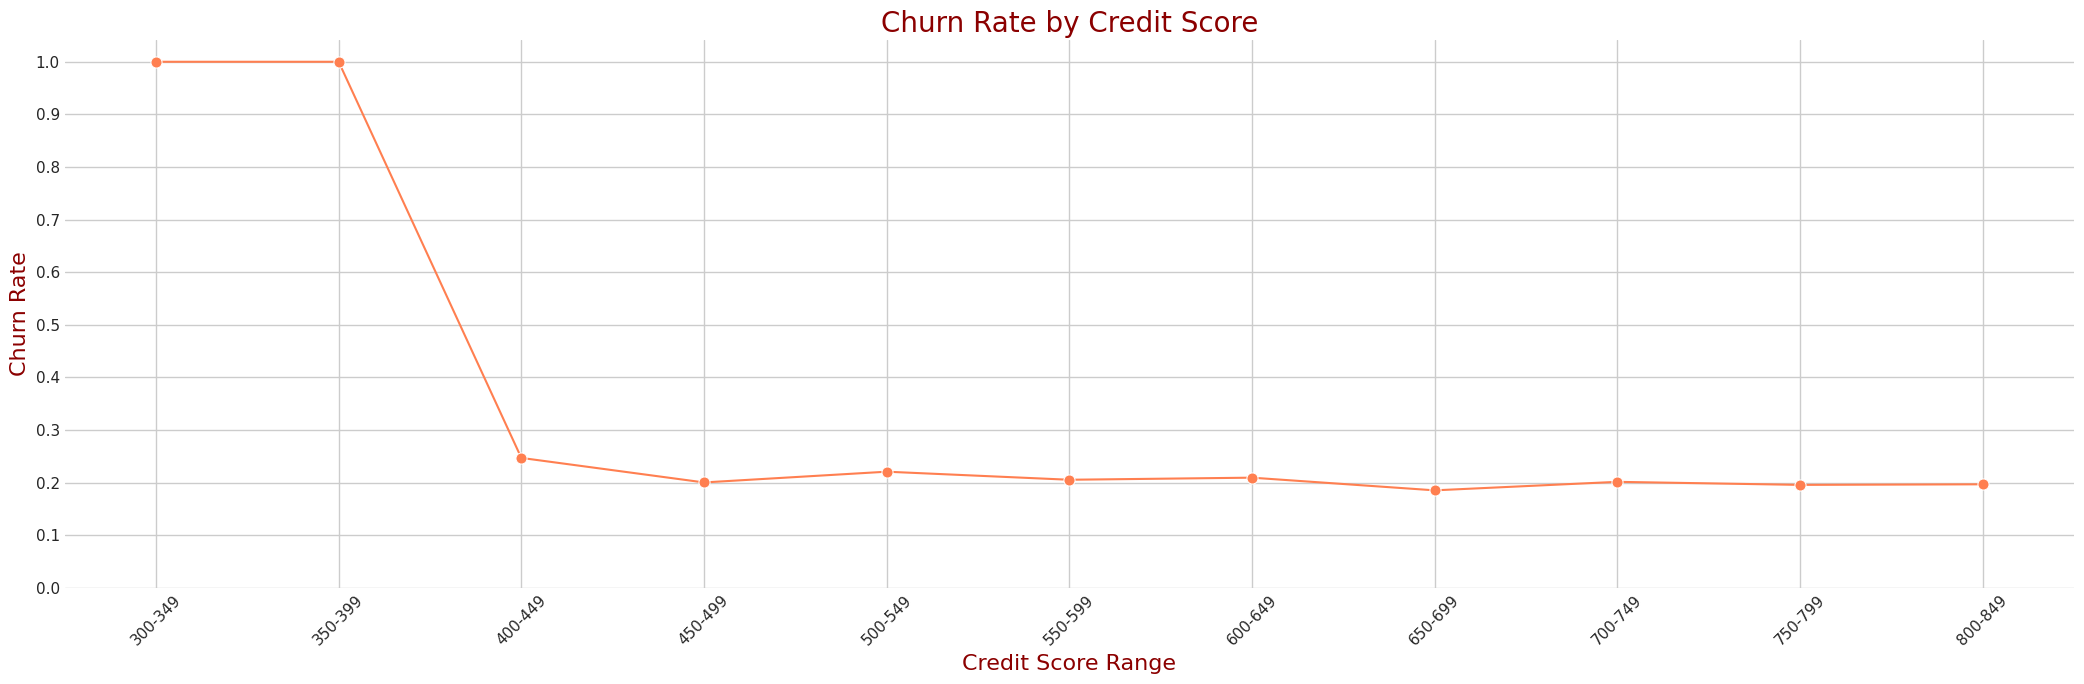

In [37]:

bins = range(300, 900, 50)  # Creates bins from 300 to 900 in steps of 50
labels = [f'{i}-{i+49}' for i in range(300, 850, 50)]  # Create labels for bins 300-349, 350-399, ..., 850-899

raw_df['CreditScoreBin'] = pd.cut(raw_df['CreditScore'], bins=bins, labels=labels, include_lowest=True)

# Calculate churn rate per CreditScore bin
credit_score_churn_rate = raw_df.groupby('CreditScoreBin')['Exited'].mean().reset_index()

plt.figure(figsize=(21, 7))
sns.set_style("whitegrid")
sns.lineplot(x='CreditScoreBin', y='Exited', data=credit_score_churn_rate, marker='o', color='coral', markersize=8)

plt.title('Churn Rate by Credit Score', fontsize=20, color='darkred')
plt.xlabel('Credit Score Range', fontsize=16, color='darkred')
plt.ylabel('Churn Rate', fontsize=16, color='darkred')

plt.xticks(rotation=45)
plt.yticks(np.arange(0, 1.1, 0.1))

# dropping the column since its useless for later
raw_df.drop(columns='CreditScoreBin', inplace=True)

plt.tight_layout()
plt.show()

The customers tends to churn the most when their credit score is the lowest and after hitting the third bracket it remains very low and stable.

###Salary and churn rate

---
Plotting the churn rate with respect to the estimated salary of our clients to establish a relationship between such variables.


<ipython-input-38-8446ac25416a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='SalaryBin', y='Exited', data=salary_churn_rate, palette='viridis')


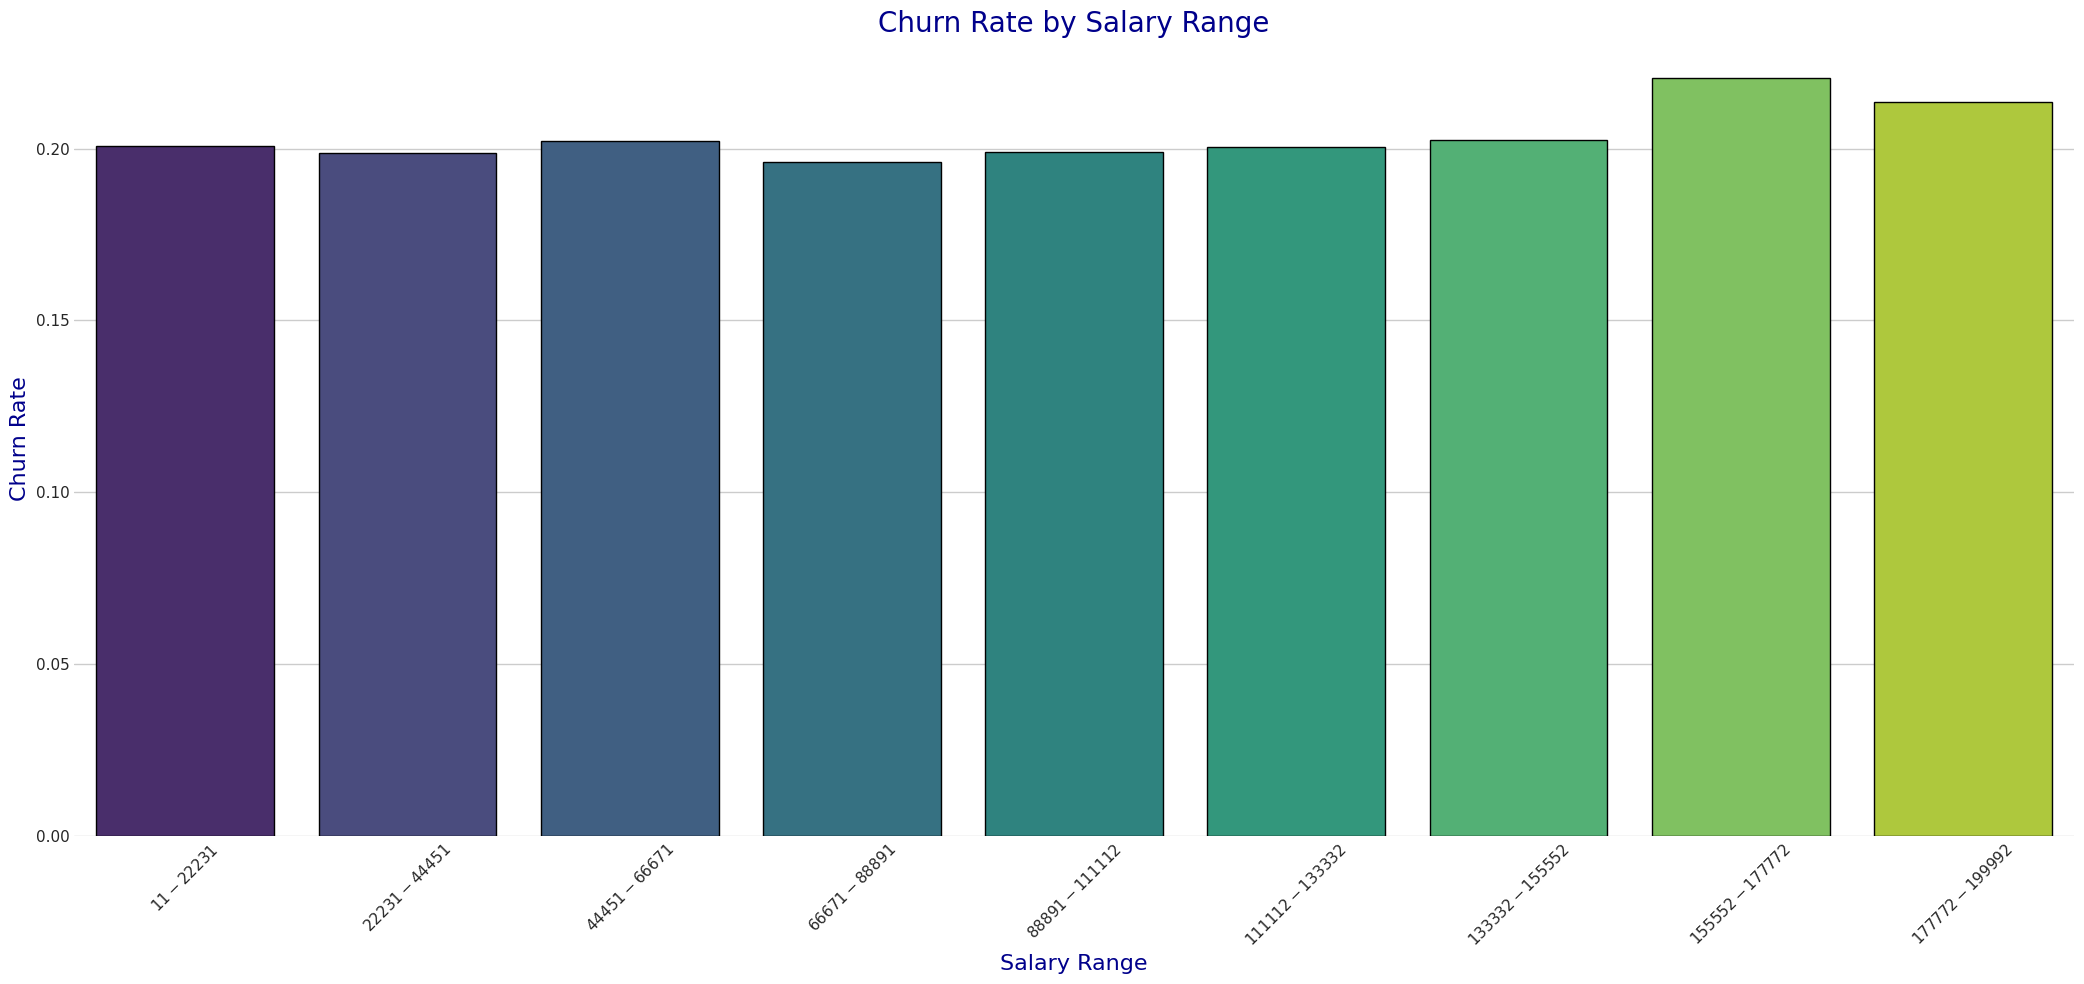

In [38]:
bins = np.linspace(raw_df['EstimatedSalary'].min(), raw_df['EstimatedSalary'].max(), num=10)  # 10 equal bins
labels = [f'${int(bins[i])}-${int(bins[i+1])}' for i in range(len(bins)-1)]
raw_df['SalaryBin'] = pd.cut(raw_df['EstimatedSalary'], bins=bins, labels=labels, include_lowest=True)


salary_churn_rate = raw_df.groupby('SalaryBin')['Exited'].mean().reset_index()

plt.figure(figsize=(21, 10))
sns.set_style("whitegrid")
barplot = sns.barplot(x='SalaryBin', y='Exited', data=salary_churn_rate, palette='viridis')

plt.title('Churn Rate by Salary Range', fontsize=20, color='darkblue')
plt.xlabel('Salary Range', fontsize=16, color='darkblue')
plt.ylabel('Churn Rate', fontsize=16, color='darkblue')
plt.xticks(rotation=45)

for bar in barplot.patches:
    bar.set_edgecolor('black')

raw_df.drop(columns='SalaryBin', inplace=True)

plt.tight_layout()
plt.show()


The churn rate tends to remain stable between the different estimated salary brackets so we could assume this column does not provide us with much information regarding the churning of the customers.

### Churn rate and number of products
---
Plotting the relationship between the number of products the client has purchased from the bank and their churn rate.

<ipython-input-39-120a49268791>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='NumOfProducts', y='Exited', data=product_churn_rate, palette='coolwarm')


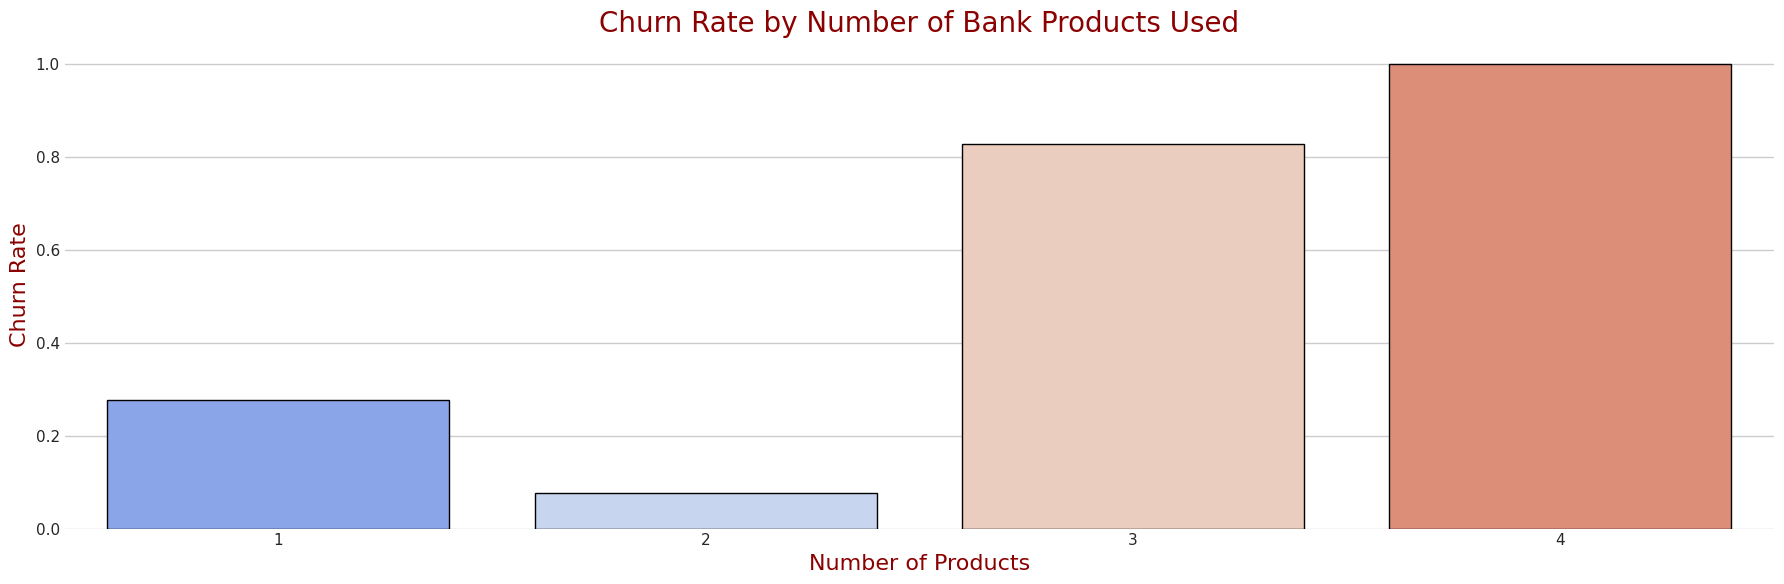

In [39]:
product_churn_rate = raw_df.groupby('NumOfProducts')['Exited'].mean().reset_index()


plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='NumOfProducts', y='Exited', data=product_churn_rate, palette='coolwarm')


plt.title('Churn Rate by Number of Bank Products Used', fontsize=20, color='darkred')
plt.xlabel('Number of Products', fontsize=16, color='darkred')
plt.ylabel('Churn Rate', fontsize=16, color='darkred')


for bar in barplot.patches:
    bar.set_edgecolor('black')

plt.tight_layout()
plt.show()


As see, the more products the customers have purchased from the bank the more they churn. This can be contributed to the fact that they have to pay for more products and this can be inconvinient for most customers and thus dropping certain services offered.

###Churn rate and balance
---
Facilitating the relationship between the balance on the accounts of the customers and the churn rate.

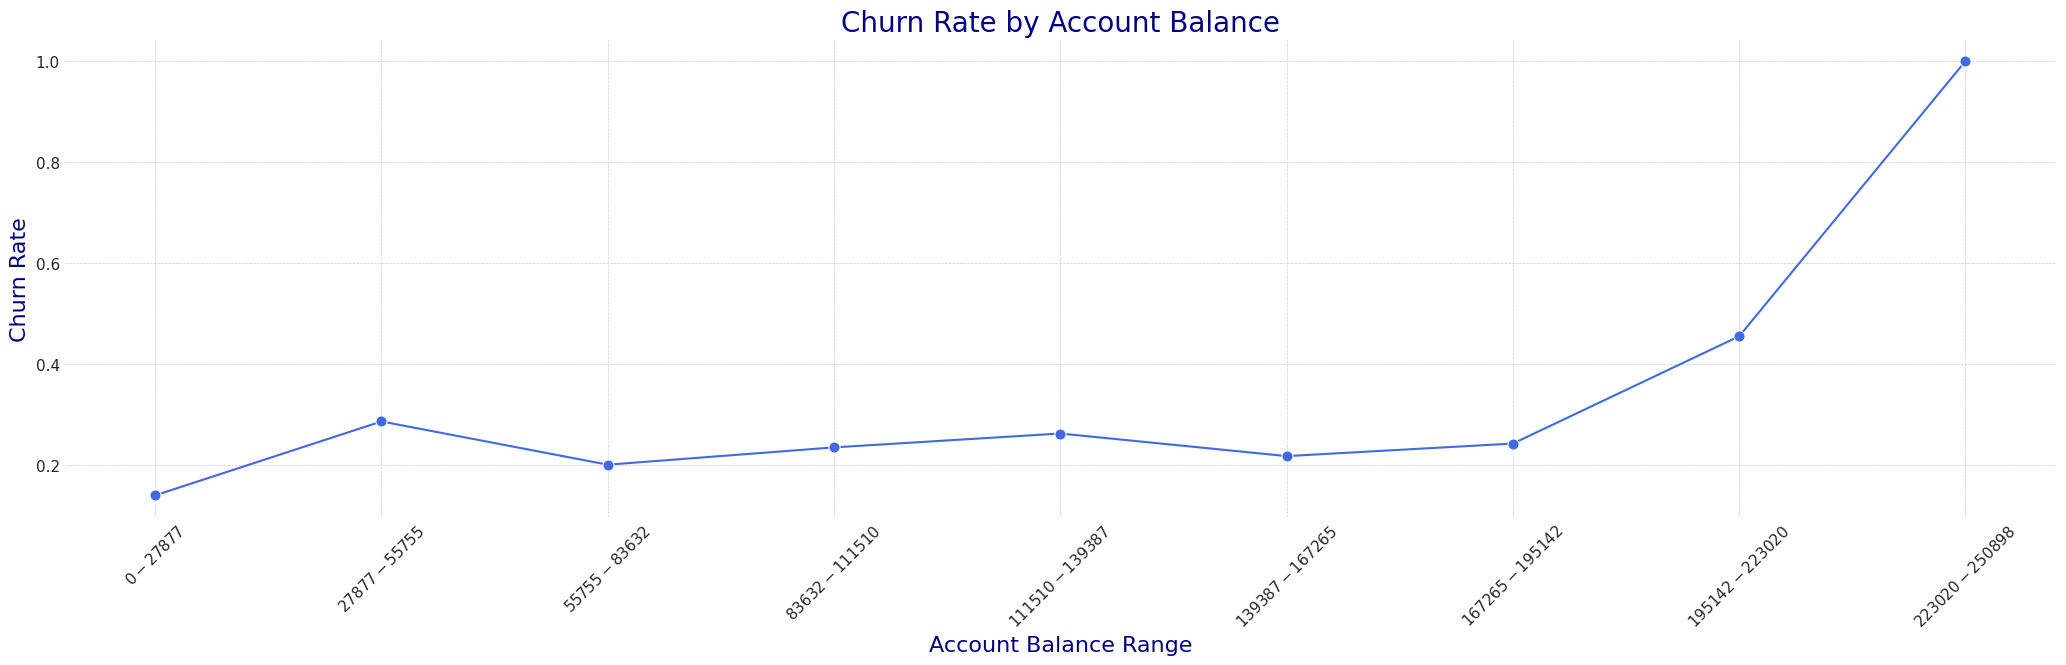

In [40]:
# creating the brackets for the balances
balance_bins = np.linspace(raw_df['Balance'].min(), raw_df['Balance'].max(), num=10)
labels = [f'${int(balance_bins[i])}-${int(balance_bins[i+1])}' for i in range(len(balance_bins)-1)]
raw_df['BalanceBin'] = pd.cut(raw_df['Balance'], bins=balance_bins, labels=labels, include_lowest=True)

balance_churn_rate = raw_df.groupby('BalanceBin')['Exited'].mean().reset_index()

plt.figure(figsize=(21, 7))
sns.set_style("whitegrid")
lineplot = sns.lineplot(x='BalanceBin', y='Exited', data=balance_churn_rate, marker='o', color='royalblue', markersize=8)


plt.title('Churn Rate by Account Balance', fontsize=20, color='navy')
plt.xlabel('Account Balance Range', fontsize=16, color='navy')
plt.ylabel('Churn Rate', fontsize=16, color='navy')
plt.xticks(rotation=45)

sns.set_context("talk")
plt.grid(True, which="both", ls="--", linewidth=0.5)

raw_df.drop(columns='BalanceBin', inplace=True)

plt.tight_layout()
plt.show()


The churn rate tends to be stable along different balance brackets but after the customers hit a certain threshold the churn rate increases. This can be contributed to the fact that richer customers could potentially change banks or even withdrawl from certain services to switch to a competitive bank for better services. As an example we could take rich customers going from a normal credit card to an american black card which gives them way more freedom and purchasing power.

###Churn rate and credit cards
---
Plotting a graph to see if the ownership of a credit card contributes positively or negatively to the churning of the customers.

<ipython-input-41-61f5fb5378bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='HasCrCard', y='Exited', data=card_churn_rate, palette='coolwarm')
<ipython-input-41-61f5fb5378bf>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(['No Credit Card', 'Has Credit Card'])


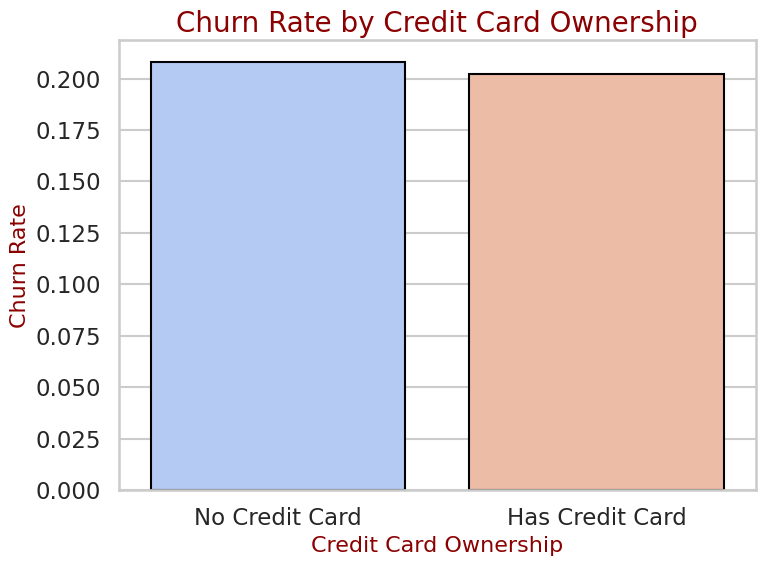

In [41]:
card_churn_rate = raw_df.groupby('HasCrCard')['Exited'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='HasCrCard', y='Exited', data=card_churn_rate, palette='coolwarm')


barplot.set_xticklabels(['No Credit Card', 'Has Credit Card'])


plt.title('Churn Rate by Credit Card Ownership', fontsize=20, color='darkred')
plt.xlabel('Credit Card Ownership', fontsize=16, color='darkred')
plt.ylabel('Churn Rate', fontsize=16, color='darkred')


for bar in barplot.patches:
    bar.set_edgecolor('black')


plt.tight_layout()
plt.show()


The customers with a credit card on this bank tend to have a slighly lower churning rate than the customers with no credit cards. This is related to the graph above between the number of products and the churn rate. The higher the number of products (such as the credit card) contributes to a higher loyalty.

###Gender and churn rate

<ipython-input-42-3bd59789f941>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Gender', y='Exited', data=gender_churn_rate, palette='Set2')


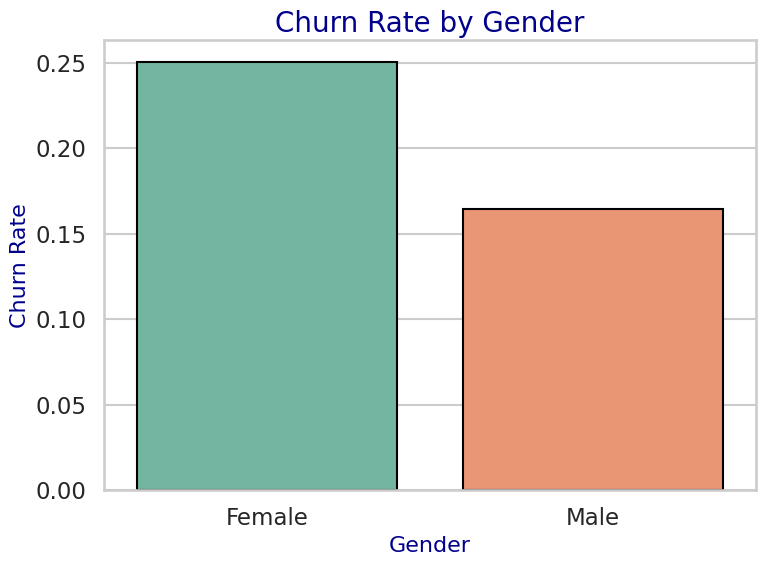

In [42]:
gender_churn_rate = raw_df.groupby('Gender')['Exited'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Gender', y='Exited', data=gender_churn_rate, palette='Set2')


plt.title('Churn Rate by Gender', fontsize=20, color='darkblue')
plt.xlabel('Gender', fontsize=16, color='darkblue')
plt.ylabel('Churn Rate', fontsize=16, color='darkblue')


for bar in barplot.patches:
    bar.set_edgecolor('black')

plt.tight_layout()
plt.show()


As seen female customers tend to churn slightly more than male customers.

###Location and churn rate
---
Plotting the churn rate with respect to the country of the customer

<ipython-input-43-42b681604b0a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Geography', y='Exited', data=country_churn_rate, palette='coolwarm')


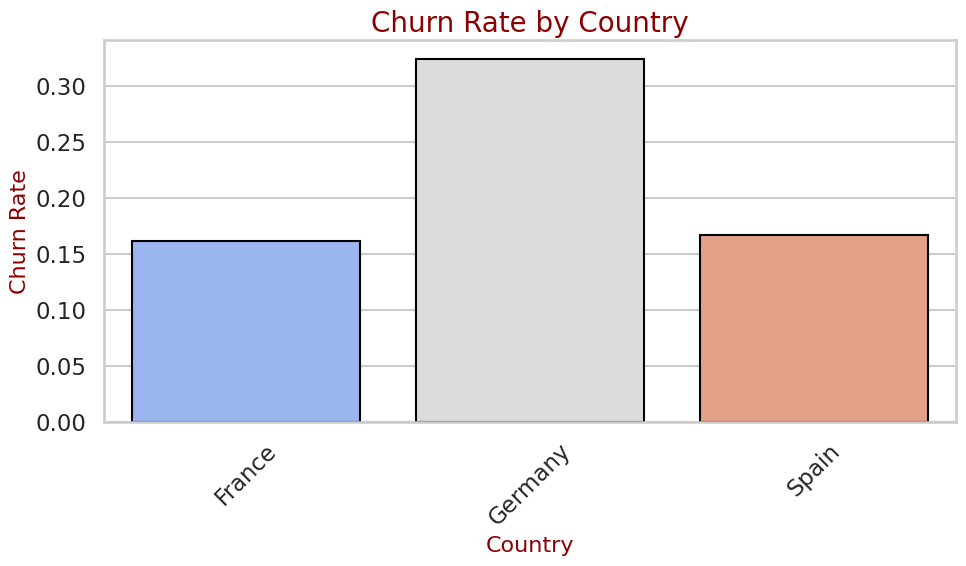

In [43]:
country_churn_rate = raw_df.groupby('Geography')['Exited'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Geography', y='Exited', data=country_churn_rate, palette='coolwarm')


plt.title('Churn Rate by Country', fontsize=20, color='darkred')
plt.xlabel('Country', fontsize=16, color='darkred')
plt.ylabel('Churn Rate', fontsize=16, color='darkred')
plt.xticks(rotation=45)


for bar in barplot.patches:
    bar.set_edgecolor('black')


plt.tight_layout()
plt.show()

German customers have the highest churn rate of all the customers.

#Data preprocessing

In [44]:
clean_df = raw_df.copy()
clean_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


As mentioned above, customer surname, row number and also customer id will be removed as they are irrelevant to the task at hand. The gender column will be dropped as well to not make gender a criterion and also lower unwanted biased contributed to gender.

In [45]:
clean_df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Gender'], inplace=True)

In [46]:
clean_df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9997,709,France,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [47]:
clean_df.drop_duplicates(inplace=True)

In [48]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        9999 non-null   object 
 2   Age              9999 non-null   float64
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        9999 non-null   float64
 7   IsActiveMember   9999 non-null   float64
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 859.4+ KB


The missing values as seen by the code in the EDA part are irrelevant compared to the size of the dataset so they will be dropped.

In [49]:
clean_df.dropna(inplace=True)

In [50]:
clean_df.isnull().sum()

CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Since Geography column is an object, we will use an encoder to turn the strings into integers.

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clean_df['Geography'] = le.fit_transform(clean_df['Geography'])

country_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Country mapping:", country_mapping)


Country mapping: {'France': 0, 'Germany': 1, 'Spain': 2}


In [52]:
clean_df['HasCrCard'] = clean_df['HasCrCard'].astype(int)
clean_df['IsActiveMember'] = clean_df['IsActiveMember'].astype(int)


In [53]:
clean_df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42.0,2,0.00,1,1,1,101348.88,1
1,608,2,41.0,1,83807.86,1,0,1,112542.58,0
2,502,0,42.0,8,159660.80,3,1,0,113931.57,1
3,699,0,39.0,1,0.00,2,0,0,93826.63,0
5,645,2,44.0,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39.0,5,0.00,2,1,0,96270.64,0
9996,516,0,35.0,10,57369.61,1,1,1,101699.77,0
9997,709,0,36.0,7,0.00,1,0,1,42085.58,1
9998,772,1,42.0,3,75075.31,2,1,0,92888.52,1


Columns such as the CreditScore, age, balance and salary will be subject to scaling as these columns have big numbers and a high standard deviation. For this task, a MinMaxScaler will be used.

In [54]:
scaled_df = clean_df.copy()

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
scaled_df[columns] = scaler.fit_transform(clean_df[columns])

In [56]:
scaled_df

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1
1,0.516,2,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0
5,0.590,2,0.351351,0.8,0.453394,0.333333,1,0,0.748797,1
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1
9998,0.844,1,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1


The other columns were not scaled as they aready are from 0 to 1 because they are binary and also for the ternary columns this is not very necessary.

#Model selection

##Train and test sets

In [57]:
from sklearn.model_selection import train_test_split

X = scaled_df.drop('Exited', axis=1)
y = scaled_df['Exited']


Since the dataset is very imbalanced, we will be using oversampling. The preferred technique for this dataset is SMOTE.

It generates synthetic samples for the minority class by interpolating between existing minority samples. This technique helps with overfitting and does not introduce duplicates but on the other hand it it evry expensive to use and also could produce ambigous instances if the data is not properly distributed.   

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, shuffle=True)

##The model
---
The model for this task will be The RandomForestc classifier and this model will be tuned and trained later on.

In [65]:
rf = RandomForestClassifier(n_jobs=-1, random_state=0)

###Hyperparameter tunning
---
To find the best parameters we will be using BayesianSearchCV which is a hyperparameter optimization method. It uses Bayesian optimization to search the hyperparameter space more efficiently than traditional grid search or random search methods.

Bayesian optimization is particularly useful for finding the optimal hyperparameters with fewer evaluations beacuse it uses a probabilistic model to predict the performance of different hyperparameter sets and selecting the next set of hyperparameters to evaluate based on this model.

In [66]:
search = BayesSearchCV(
    rf,
    {
        'n_estimators': (100, 400),  # range of "n_estimators"
        'max_depth': (1, 50),       # range of "max_depth"
        'min_samples_split': (2, 25),
        'min_samples_leaf': (1, 25),
        'max_features': (0.01, 1.0, 'uniform'),  # sampling uniformly
    },
    n_iter=50,
    random_state=0,
    cv=5
)

search.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
              random_state=0,
              search_spaces={'max_depth': (1, 50),
                             'max_features': (0.01, 1.0, 'uniform'),
                             'min_samples_leaf': (1, 25),
                             'min_samples_split': (2, 25),
                             'n_estimators': (100, 400)})

In [67]:
best_model = search.best_params_

###Best Model

In [68]:
print("Best parameters found: ", search.best_params_)
best_model = RandomForestClassifier(**search.best_params_)


Best parameters found:  OrderedDict([('max_depth', 35), ('max_features', 0.01), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 400)])


##Training

In [76]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, max_features=0.01, n_estimators=400)

##Evaluation

In [77]:
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]  # probabilities needed for ROC AUC


In [78]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for the oversampled data: {accuracy:.2f}")


Accuracy for the oversampled data: 0.90


###Classification report

In [79]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report with oversampling:")
print(class_report)


Classification Report with oversampling:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2028
           1       0.89      0.90      0.89      1952

    accuracy                           0.90      3980
   macro avg       0.90      0.90      0.90      3980
weighted avg       0.90      0.90      0.90      3980



As we can see from the classification report, the scores are very similar after the SMOTE oversampler was introduced and this can be contributed to the good distribution of the data and also the sythentic unambigious samples generated by such oversampler.

###ROC-AUC curve

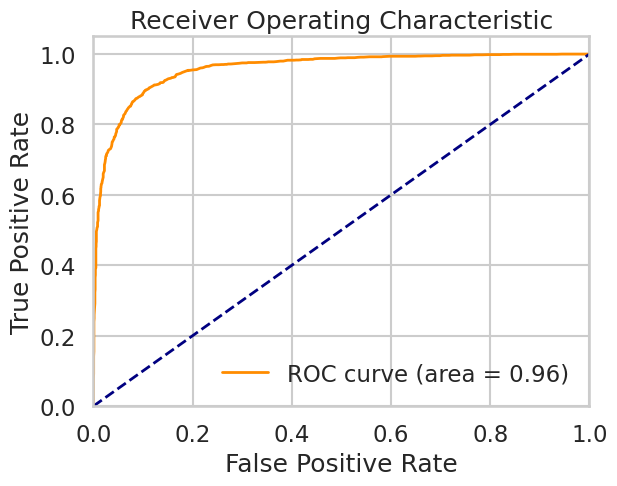

In [80]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The orange curve represents the our models performance and it is very close to the left upper corner meaning the performance is very good.

###Precision-recall

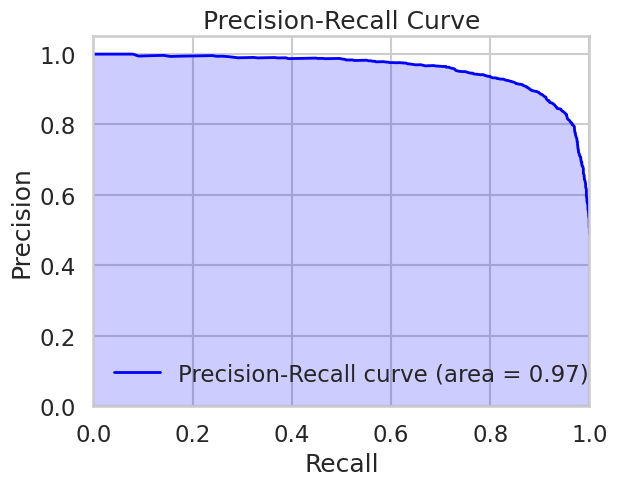

In [81]:
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


This graph shows the trade-off between precision and recall and a change in one of them results in a change in the other as well. as we can see, the curve is very stable and even at high scores of recall we have high scores of precision. This can imply that even if we try to optimizie one metric the other might not be affected negatively.

###Confusion matrix

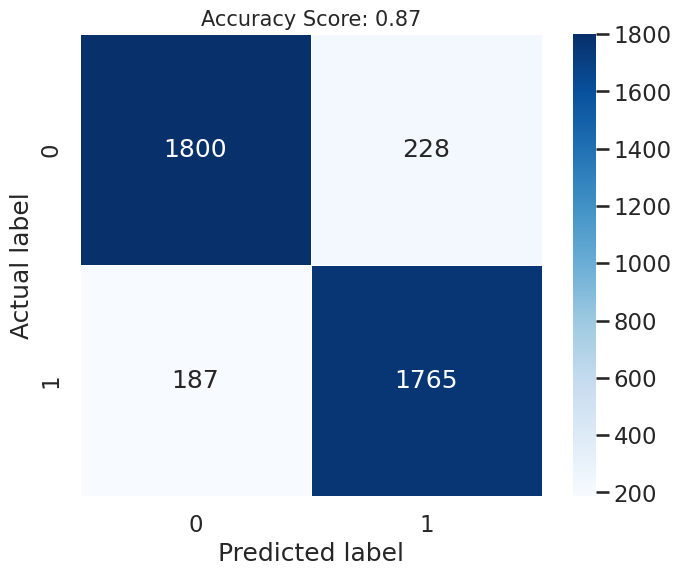

In [82]:

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cmap="Blues", square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(np.round(accuracy_score(y_test, y_pred), 2))
plt.title(all_sample_title, size = 15)
plt.show()

The confusion matrix shows us that our model is able to generalize very well as it results in a lot of true positives and negatives.

#Conclusion

This model can be considered as optimal for the task at hand as the scores proved to be very high. Of course, if more models were used or a bigger parameter space and more parameters that could be optimized we could see an even better performance from the hypothetical model that could result from such approach.

Such performance can be contributed to the preprocessing stage, the quality of the data and as well the oversampling used to balance the data.  